# Forecasting Air Temperature in California using ResCNN model

* [Introduction](#1) 
* [Importing libraries](#2)
* [Connecting to your GIS](#3)
* [Accessing & visualizing the dataset](#4) 
* [Time series data preprocessing](#5) 
    * [Converting into time series format ](#6)
    * [Data types of time series variables ](#7)
    * [Checking autocorrelation of time dependent variables ](#8)
    * [Creating dataset for prediction ](#9)
    * [Train - Test split of time series dataset ](#10)       
* [Time series model building](#11)
    * [Data preprocessing ](#12)  
    * [Model initialization ](#13)
    * [Learning rate search ](#14)
    * [Model training ](#15) 
* [Air temperature forecast & validation](#16)   
    * [Forecasting Using the trained TimeSeriesModel ](#17)
    * [Estimate model metrics for validation ](#18)
    * [Result visualization ](#19)
* [Conclusion](#20)
* [Summary of methods used](#21)
* [References](#22)
* [Data resources](#23)

## Introduction <a class="anchor" id="1"></a>

A rise in air temperature is directly correlated with Global warming and change in climatic conditions and is one of the main factors in predicting other meteorological variables, like streamflow, evapotranspiration, and solar radiation. As such, accurate forecasting of this variable is vital in pursuing the mitigation of environmental and economic destruction. Including the dependency of air temperature in other variables, like wind speed or precipitation, helps in deriving more precise predictions. In this study, the deep learning TimeSeriesModel from arcgis.learn is used to predict monthly air temperature for two years at a ground station at the Fresno Yosemite International Airport in California, USA. The dataset ranges from 1948-2015. Data from January 2014 to November 2015 is used to validate the quality of the forecast.

Univariate time series modeling is one of the more popular applications of time series analysis. This study includes multivariate time series analysis, which is a bit more convoluted, as the dataset contains more than one time-dependent variable. The TimeSeriesModel from arcgis.learn includes backbones, such as InceptionTime, ResCNN, ResNet and FCN, which do not need fine-tuning of multiple hyperparameters before fitting the model. Here is the schematic flow chart of the methodology:

<img src="data:image/PNG; base64, /9j/4AAQSkZJRgABAgEAYABgAAD//gASTEVBRFRPT0xTIHYyMC4wAP/bAIQABQUFCAUIDAcHDAwJCQkMDQwMDAwNDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQEFCAgKBwoMBwcMDQwKDA0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0N/8QBogAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoLAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+hEAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/8AAEQgAOwMqAwERAAIRAQMRAf/aAAwDAQACEQMRAD8A+yjxSA5TUNRmupntbRvKjiwsswAZ95AbyotwKAhSpkkIcAPtUK4Zo+uEOrOdvsZR0xW+9NdsfX7Zcr69kmVR0P8ACPw5xraPZE6gNLTtLec/9P157gf8t/Ud+nfGDRyx7C1D+y4/+et5/wCB177Z/wCW+e/Axk9MDIyuVdhah/ZaD/lrd/8Agde9ef8Apv7HPofUc0+Vdg1D+y4/+et5/wCB177YOPP9x+Y75AOWPYLMP7Mj6+bd/wDgdee+f+Xj2OPXGTheaOVdg1D+yk/563noP9OveTkAD/X+47dTijlXYNQ/syMf8tbzH/X9eemf+fj2P4DPIIycq7BqH9lp/wA9bv8A8Drz1wf+Xj149eegIYA5Y9g1E/syMDPm3f8A4HXn1/5+PTn9Ocrk5Y9g1F/suMHAlvP/AAOvPf8A6b+o59O/QgHLHsGof2XH/wA9bv8A8Dr32/6b+4I/oTijlXYeoDTFX7s12p9ftl02OcdHlZeOc5GMjv1DtHsPU1LDUprOZLa7bzY5jtilYBXD7dwjlwAjbgG8uQKmdojYGQhnxnBLWJSdjqwc1ybHQOpgFABQAUAIxxS16AYOq6q9swtbZQ9w6l/mOEiQHHmPjk5bhIxgyEMNyKGYbQhf3nsZylYxCL9iSb2VDzxHFbKvXsJIJWwP99u4yTxXXy0+1/m0YJyezt8kw8u/7X9z3/5Z2X4f8unc/kASemKXLT/l/GX+Y/e/n/8AJUJsv/8AoIXP/fuy6ev/AB6Z68Y65I4wc0ctP+X8Zf5h738//kqDy78cfb7nP/XOy9f+vT05PbAPoaOWn/L+Mv8AMPe/n/8AJUGy/wD+f+5/792X4f8ALp36fXjqQKOWn/L+Mv8AMPe/n/8AJUGy/wD+ghcj/tnZf/Inb/6/Tmjlp/y/jL/MPe/n/wDJUGy/H/L/AHX/AH7ss9en/Hp1Hf06cmjlp/y/jL/MPe/n/wDJUGy/H/L/AHP/AH7sv/kTv27HI9RRy0/5fxl/mHvfz/8AkqAR3/8A0ELn/v3ZdO5/49O3p1znjgmjlp/yfjL/ADD3v5//ACVBsv8A/n/uv+/dl+X/AB6enPoeACSRRy0/5fxl/mHvfz/+SoNl/wBr+57/APLOy/D/AJdO/wCnOcEEU+Wn/L+Mv8w97+f/AMlQbL//AJ/7n/v3Zf8AyJ2OBjrkjjBzRy0/5Pxl/mL3/wCf/wAlQBb9SD9unYjs0dmR1xj5bZCfwYevODg5afRW+bYe8t3f5JGrpmqyrKLS92l5NxilQFUk2jcVZSTslC/NtDMHVWYbSCgwnC2sdjSLOlFciv1NxaoAoAKACkA0nFD0BGFquqvbOttbKHuHUtljhIlzgO+OuW4SMEGQhhuVQzrvCmpXc3b5N3MJza0iYhGoPljeyp1OIorVU9cDzIZWx6bnz6nkZ6FCnHz+9Gd5v+kJ5d+P+X+5/wC/dl/8ifhjrkjjkVXLT/k/8ml/mFp/zW+SYbL/AKfb7nP/AFzsv/kTsOT7UctP+X8Zf5h7/wDP/wCSoNl9/wA/9z/37svw/wCXTv2/AHB4o5af8v4y/wAx+9/P/wCSoNl//wBBC5H/AGzsvx/5dO3/ANfpzS5af8v4y/zD3v5//JUGy/8A+f8Auvp5dl1z0/49Oo7/AONPlp/y/jL/ADD3v5//ACVBsv8Atf3P/fuy/D/l079R2OR6ijlp/wAv4y/zD3v5/wDyVB5d/wD8/wDc/wDfuy/+RPUgeuc8cGjlp/y/jL/MPe/n/wDJUGy//wCf+6/792X/AMienOemCPWjlp/y/jL/ADD3v5//ACVBsv8A/n/uf+/dl/W0+v5HOMHBy0/5fxl/mHvfz/8AkqDZf/8AQQuf+/dl+P8Ay6dumOuSOMc0uWn/AC/jL/MPe/n/APJUL5d/0+33P/fuy/L/AI9PTn0/AEg5Kf8AL+Mv8w97+f8A8lQm2+HP2+445+aOzx074tQQO5+YYwcngijkp/y/iw97+f8A8lRfs9VntJFhviJY5HCJOq7CHPCpKg+QF2G1HQqGcqhjVmXdjOEVrBW76lJtbu/ysdWDXLsboWgYUwCgAoAOlAGPqup/YFVY182eUkRxlggwvLO7YYpGgxucK3LKoBZxVwhciTsc8f7RlO57x4iccQRW6oPp50c78Y/vE57dcdnJBfEr/Nr8jnTk9nb5JjQl/wD8/wDc8/8ATOy/+RPTnPTHrzg5af8AL+Mv8x+9/P8A+SoNl/8A8/8Ac/8Afuy/D/l079vwHUgUctP+X8Zf5h738/8A5Kg2X/8A0ELke/l2X/yJ2/8Ar9OaOWn/AC/jL/MPe/n/APJUHl3/APz/AN19PLsuuen/AB6dR3/xp8tP+X8Zf5h738//AJKg2X/a/uf+/dl+H/Lp36jscj1FHLT/AJfxl/mHvfz/APkqDy7/AP5/7n/v3Zf/ACJ6kD1znjg0ctP+X8Zf5h738/8A5Kg2X/8Az/3X/fuy/wDkT05z0wR60ctP+X8Zf5h738//AJKg2X//AD/3P/fuy/rafX8jnGDg5af8v4y/zD3v5/8AyVBsvv8AoIXP/fuy/H/l07dMdckcY5o5af8AL+Mv8w97+f8A8lQuy/6fb7n/AL92X/yJ2HJ7Y6Zo5af8v4y/zD3v5/8AyVCbL/8A5/7n/v3Z/wDyJ37e5A4PFLlp/wAv4y/zD3v5/wDyVAY78f8AL/c8dvLsv/kTpnjjGTjkZGXy0/5bfOQXa3d/kkWItVutN+a8cXFvxul2hJIhnG5wg8t4xuUswCNGuW2yLkrlKEX8H9feXzWOyWuM3FpgFABQAUAFAGbqmoLp0QkYF2ZgkaDG53boozgDgFmJ4VFZjwDioq5Em47HMtJqNydz3Jts5+S3jiYLz0Mk0cpYgYy21Aeu1eg7UqaXvLX5/oc7c/6sMCX/AGv7nkf3LL1/69Pxz6A4zg0KNJ/DG/zl/mO8n1t8kw2X/a/uv+/dl+H/AC6d+2e+B1IFPlp/y/jL/MPe/n/8lQbL/wD6CFyP+2dl/wDInb/6/QZo5af8v4y/zF738/8A5Kg2X4/5f7r/AL92WevT/j06jv8AlyaOWn/L+Mv8w9/+f/yVBsvx/wAv9z/37sv/AJE79uxyPUUctP8Al/GX+Y/e/n/8lQBL/wD5/wC5/wC/dl09f+PTt6dc544JpctP+X8Zf5h738//AJKg2X//AD/3X/fuy/L/AI9PTn0PGCciny0/5fxl/mHvfz/+SoNl/wBr+54z/wAs7L8P+XTv+nOcEEUctP8Al/GX+Ye9/P8A+SoNl+P+Yhc/9+7L/wCRPXAx1yRxg5o5af8AL+Mv8w97+f8A8lQeXfjj7fc5/wCudl6/9enpye2AfQ0uWn/L+Mv8w97+f/yVBsv/APn/ALn/AL92X4f8unU9Prx1Io5af8v4y/zD3v5//JUHl3//AD/3P4x2WPxxaDj1/PpzT5af8v4y/wAw97+f/wAlRYh1a6035r1xcW/G6TaEki5wWcL8jRjILlVQxLkkOM7M5U4y1pq1ul7/AJlJtfE7/Kx2KnNcdrG6HUrjGnpVIHoef6Xykx6k3l7+O27mA/IKo/DJ4GR3r4UcnVmn/n8xx6divuPXuFYoO3pxxj3244/EED2wMHbgAXgf/rHTg8e+N3TOR6ggFiEAx14/P0Az7kduTwo/vA0AYmr+ILPQ3hjuzN5l0WEUcFtc3LuUAZ8R20Uz4RSSxIA644wAhk2ka3aa5G0tm5fy3aORHSSKWKRdoZJYJUSaJ84YJKiMylGAKSBmAsXrm6hso2nuXSGFMb3kZURQcDlmO3+IKME+xyUwgJxn8fb1yOevYhjx1IxznliD9Onr0OBjPXvj1IAOMldrAB69zjJ/Ff8A6+Mcc8DB5AE/TjnnoOR6g8Y/8cznJBoAU+/v/X/7INjB69Acg2HsHf8AH+v+OCM88Y4wdsgZmqfIkLDgi8ssH3N3Ap7DqCynA6cDByA/ssnqj0AcCuE6kOFIAoGFABSAa1Hkh+RwqHdqF8xOSs0UYyRwotYJAOvA3SSHt1J6ZI9GLtTXnfy6nE9ZNf1sXenPpz39Pw549uRxgj5Ek0u34l+mgYxx0/z+HcE9hna2BtOHr3FqZWqa5p2iKrandW1kJchDcTRwhiANwTzGXdgEZx0UYOMnCbaHqGl69p2t7zpl3bXoiK+Z9nnim2bs7d/ls23dtfGcZYk8EkKXfcNUag/w/LjtjGMkdeMBR64Ne4tSC2u4Lrd5EiS+U7Rv5bh9kiY3xttJKyKDghsON/OC2Aa9w1LHsPb/ANlH0xyCO33QQPmwa9w1RzVz4z0Gyla3udS0+CaNirxSXdujoRncro7hlP8ACVYA8nIBY7VdjszoIJo7qNJoWWSOVVZJEKsrKwBV0YZBBGWVgfmG1gdoyHr3FqS+hx6duOeMdBjrtwcZx6sxU17hqJ29uP8AP14JHbJVvQh69x6oXHb9B09Px4P1KjB6nDuwAf8A1/5E88dc5B4wSxJGW2z6gZupEosLjhlu7PHb79zEh7dCjsMcdc4AwKJbOxOzPQFGK4DqQtAwoAKACgBuKl9+wttDhlO7UL5jyUmijH+6LWCQL9N0rkDpliT7enHSEX6/mc3wykvT8i3+Xp+p55PPQ4z75OCcTcd2B/L+nXPX9Se2S2PmxV2F2L/n9f8A9rqRySeCflWoBjsP89sdD3xkEdAARlWFGvcQd/8APQ5P16Z56jc2T3Br3FqHPbr/AF/pg+3YEgBTS17j1A8c9uT+GD69scEc/eYHuwevcNQP6/r+o65Bwex2+hCmvcNROB6f0/LjAxhSOwJB6MaWvcNRen4fpjr17jBPPQ84GPkLvuGodv8APuD/AE7/AHeCeGouw1F6HHqfp3H+Oeo+Y7uDna/UNRB2/D+QPseOOvGOO3ygamP4gOzTblxwUgkceu6NCwP4FVPTPGODjbpFX0Jbsrnoo4rzNzrWmg6kMKACgAoAQ0g8jir0ltYkBP8Aq7SDb7ebLchyO4z5cecdQvrgHsg+WLlY5mtbXJj+v4/lxyBznt2I5xnV6bMNtEL9P0+oGe3P0GB0GcJuV2LU5m58aaDZStb3GpafDLESrxyXdujowByrKZMjBABBHYLjIwVdoeps2upWl+SLSaKcqqOwikSQqkq742OxmIWSMlkb+JWJUtuU09e4alw8ex//AFD8eeOAein0BevcWovf/Pf684IOfcEjkspK17hqGD7g/TkdOckeuSD2wv8Asinr3DUB+H9Oe3bgjAx3Bx1YbzXv+Aale5u4LKI3F1IkEKYzJKyoq5IC7mbCgkk4ycFiNvJXBr3DUsDnj24/Ef8A6h1Jx8vOV3K77hqAP+f/ANXU43Hg8kkgZZTRd9w1DGP8+x6fiPToo44wzux6h9P6e4P043c888jP8S331F1GSRiVCjcqylT9CD+HQn1weRxndcbJaIUlzK+1jX8MyGbSrORuWe1gYn3MSk158t2bwd4pm3UmgUAFAB0oATNAlqcjrpzqNoh+6sN3Jj/aVrVAfqFkcA+55AJrtoNpStpt+pz1L3ik7b/oGPz49+nPp/LkdsYG3S7fX8ATZhX3inR9Mn+yXl/Z21x8p8mW5hjk+YDYQjyKw3DlW285XBxgCb20QatXNwD0+nH8vT6A/wB0Keh2vXv+Aaijj/J9j3GemRk8nf1y3Br3/ANQ6eg/+tx244wW44+Uehw9e4ageP8AD+Y5AJ64I9znljtXzFqGO368ewyD7ckH3Xt0Ne4ah74/D8Bx2xwQPp7sxVarqGpXt7uG73eRIkohcxSFHVtkiY3IxBwsinkq3KkqzKOoNe49SfGR0x26HAyPpnvj1IH+9tevcWo4e3+eh/xPblgTgscLXuGqOYj8X6VJef2cszGbzWtw3kTiBp40MjwJcmIWrTIqtuiExcGPYVDKwVcz2KszpsY46Y49O5BGTz2PJ5OS3rtq77kjJEEqlGHyuCCOnBHp9Cefr0I+UTewPua3hqRptKs5HOWe1t2Y+5iUn9TXDJa2N47XNzNSVcafShDex5/pf+rm/wCvu+/9LLj88Yzx159CR6C+FHKaZ/z+bf8A1weh65wckAB/+v8AQZPbjJOenfOOdoAY/n+ufyzye3X0yQoAgHbjnHt2A/DrgHHAwf4eQaPO/F+o2mlazo11fzQ2sCvfhpZ3SKMFrQAZaQhRuLYC55JwA2MVDKOd1DWI/O1XxDYmVtOa1sbQXEDrClxOlzMsky3JRwLWGOeOKe+jSTy0WV4HZ4MpKGcdd3Z1bR9ethKZ7S0jsbmI2+p32oRqSzidkvZlhllhCxZkiPmW0UiSEMJFfYgOj8W67ZRiO0sLp5IBZPNbTSa5d2yzO0kqr9jmt1urrU7tXTDQySOsf7hFUtKcDA9Y8L3smpaRY3dwweW4tLeSRgAMvJFEzHaOBlmzgYHOF6gDREs3TyOe/r05/wD1tzj/AGh2qiQ6fhz27En6Dkc+5J4ABAADgemP6DHOcYGeuemM8Y+RAJ9Ofb3AHHTPUDpnByAMhKQGbqoAjiA/5+7IZ9R9tg6/hg+hBGBjGH0Yj0AVwnUthwpAFAwNIBM4p7D2GMfShaNeYlZs4eI/6ffj/p6j79vsVp79PyBwehGR6EI3pxa8/wD0pnHa038vyLg456f5Ht+B6e+APlSvsy7i4xx07enoD0A7ZJ6dOcHG1iMbxH/yCr3j/l0uP/RLHtkfp2x0K4llI4C3ur+UeH9MtLp7GC60qSSZo47eSU/Z4bDYI2uI5o0b96+4lJFaNmVkD7JYpGUL7xbewX8FxbTXc1m+rR6cxaPTo7F/na3ljUM51VriJtx80BY5JI2dIhAwpDLCahfDzreymWyefxHNaGWO3g3CHyC7Er5YR5sjcs8gd94UuZkUxsCNzRNc1C3F9ayxXOsvp+oNapJGLGGYxG3trhWmEk1jBlPP8vdEoJCo7LwxLQFnXGLa7oZIKktfnacZXNn0ONwznHRmGc4JwCRgctZ694h1S8mubSK7kS31OW1aFf7KWx+zQz+TIZDLMuqfaPJ3XAI2oZDEqwvCctIzaiu9TtdW+zavcXtul7PPDZNbppzWDgxO8KDdbyahHcJCrO/ngW7TQuFd4WjRmA74V20kGhQu9xLcq7zYWQQBYttxcAiPyYYj8/328x5MN9wonAqJLPR+n6en+z647j2xkZxjiyQA6cenbr0x2HXj8ew/gAMzVB+7hx0+12P/AKWQEenY/wD6vuqnsyep6CK4DrWwtAwoAKAEbilrdWE0MzilzIb3Rw8f/H9qGOMXMZ/8kbX6c8Z6+nIzXpxVoR+f5nI1acvl+Rd6e39PvY/L8DwOMdIGHQ/j/LJ/l9PujkHlaAPT8B0Ht6DuMDtndjjJAAEPvj9D6+vXgc9MjJ4H3QYv+f5j6nP0B5I4OdqAD69e/wDXn2wR269BkpQAYxkD349eo9uSQM9QSxPQggEBGP8APH9M8kNnv68rQAdPz9vbn3HIPHXccDBTIAfT/PXHT69c4zls8qQABHP16dPoOvUdAR1wcHAPyoBDj6Dnnjvnk/gc8jp16nDQC8nPvkfT73Hbjk9Tng9OSrAx/EOf7Mu/X7LOeh/55N7eo5+h6DO3SGjInsz0U15a2OzqhwoAKBhQAUANY0bAlc4q841ef/rztPX/AJ633X29+2c9M12U3em/U5JK0/67Fn+mf0I684Gcc9Od2SMtttlN6if59un5dev/AALIGThCOI1/jX9EIz97UPTvaZ5JA9e5wTzgZJCZSOW8Qaxe6bca02nvFbzxzaGkcvkRMf8ASZkicynYjTrtfCiR8xgkRSQnDUhlLVtS1zSF1pk1OWVNChgu4N9vZ7598HmPBcMltGDBmJlXyY4JU8w7pnCRgShlvU9c8QXmo6hbaTHds2mm3SCG3GlC2lZ4En/0w3kyXflysxizZmILGjlZHl3bGBs6jqGp6bqS3OoyXdtpjyWiQm0Gnvbo022Mw3omikvhK9yREJLTMPlPES8TJKwAMWz17xDqd1LcWcV3Ilvqctq0C/2UtgLaGcQyFzLMNT8/yQbhSAEMhjUQvCx3gFbUb7UbnRdW1K6uvPW2vbu1gtXtrNrdY4NQ8uNpFkt3kllUDAZnSMIVZ4mlBncAu6trniC91TUbbSY7tm01oEgigGl/Z5meBLj/AE03syXZjlZjEDaeWqxo5R2lDBQRrajqGp6bqS3GpyXdtpjyWiRG0Gnvbq0u2MxXwmikvhI90fLMlnmERvG2+KRZXAB6R09B+np6Hp24yQNvUAE6okXv9MenHIH17YPTvwQORiE//V/+s9e/cnHOfuk047B9l/L8zR8K/wDIHsf+vS3/APRSVwy3Nafwr+upv1BqFABQAho2EITipV2PY5DW+dTtB/063n6yWQ/z69BzXdQ2l/27+pzVFaUfmO75PsfXuD9OoP8ATqpFoS6/I8zsZtRj8TaqLGC2miZdN85prmWF0/cSf6tI7S4Ep2lj8zxcgDdkkjPqVHZGS/iLUmtm1xbwgpq50/8AszyrcxFBfCyMbN5X2v7UY83gIuFUEIDbtEvzlyiG58QaxaaXqOsfapJWg1G4sILcRWyxQxDURarMxZI3eaGNm2PLcQ2+BGJ0O1p3ALN1rXiDRrO7e4S5jhL2UcF1qI0xpYGuLlbe4Zk02TyGit43jnjMkaEOZFkZo0XBcRt6tfz6JALL+0bi8ubm6jghEcNgb7LwmTyVLC209GKRtMktzCiiINGqzSNG1AzD0vWNe1nTbhLV52nsdVktZz/xLRqDWyKrsqEbtKN1HJKqPnbE8McgG25OWAKs0ja1qOhTw39/Gwk1KF2ljsFnSaCNxMkgWzMBcMrQOYg0TIgeIlyZnQFpdQvgJrexmSxefxFPaNLHb25YQmDex2mNVabKhlnlDPuVTJ5yKYmYiteeJdUsFfT3ubiRo9cFg13BaRT332U2SXxZbeG2aFpFYiKSRbRgsOZPJaTaQXsM7vwd/aBsXl1SW4uHknnMJuYYYJRbLIy2+6KKCDy3eMB3SVBLudg6x7/KRoTPDhrcmgWyeKbz97pmoSXd1plpvTyLDVpvPKx3h+SWQzHzMOZBBZzGYNEn7m4SCj6agZmjUuV3FQSUJ2E7c5XBJK9CvJOMf7ArVGTJenHT8h2Pv7fhjg4UEUtxPZl/wr/yB7H/AK9Lf/0SlcU/i+bN4fCb9SUIaRT2PP8ASv8AVy+95ff+ls/59vfOORgFe9fCjlNP/HI9/pkjrxjvyOnVAYDj9Pzz2PGTjGOmcjGONoAf5/DPr6YPfHy5HAJCsQZ/+vz+YOc9yevYHdnDZQB09v6988+2ffg56HIMOh5zn6nOPm+h9epznJz1LAC5Ofp9T6D9M8/h2HCsAgOOn+emO+en9MZz8zEAOfU/jnjr7jt3znrySSzATGPr0/n7HqT3znOOc/MtgFP5f/qPr355zzk5PBJZgB68e/8AUeoPYd+Mfw4+QGB9fx59sn1/U9wDwc4QjJ1oukEflgM4urLarEopb7XBgFgrbRngkISBkhDjarto7kvS1jpBc6v/AM+tp/4Gzf8AyBXFZd/w/wCCbqT7fiO+1ax/z62n/gbN/wDIFFl3/D/gj5mugfatY/59bP8A8DZv/kCiy7/h/wAEOZ9vxD7TrH/PrZ/+Bs3/AMgUWXf8P+CHM+w03Or/APPraf8AgbN/8gUnFX3/AA/4InJ9vxPK9f1vxFa66sNjHlzDGWto2e4hI3P8zFooPLz/ABEBD0y5HT2qNOg6bdWVuzs+7T2bXbc4JTmpxUV36rsdXpEtzLNePeRrDcG4j3ojl1DfY7Po2B7ZwCFJI3MVBPNK0IxUJXWvS3XzN6bbbv5fkbY4/D/6x7dOOeox2wACI16lgOOntx9NuPT09uOw6KARyRpKhjkAdGBUqwBVgcggg8MGBwRjnOPvHIAIUsLaNonSGNWt0McLBFDRRnYGSIgAoh2IMJhflXjARQrDM/8A4RzSzcm/+xWv2tyGa4FvD5zMpDIxk8suSrKjKckqUjYfMF3Kwy6NNtEOVghU+aZwRHGP35G0zdP9aVyPNB3EADeRuoETwW0VuXaGNI2ncPIUVVLvtRA8hCgsxRETc5J2qgPCkB2sA17aGaRJ3RHli3GNyql03rhtjMCy71Kq20jcCQd38QIzbjw3pN3dDUJ7K0lu1ZGW4e3haYFCnllZWQuCnVCGLLwV5wKViri2fh3SrC5a+tbO0gupN26eK3hjlYyEFt0qxh23/efL/NySTndTsFyzZaVZac8slnBBbPcv5kzQxRxtK553yFFBkY7idzbjlz67WLWEaGCfxz6+mO2fTHfOec5+diAjP457ZzwfY54JPr3O7OHQGTrTlIUdVMhW7smCrt3P/pkGFUsVXLEgDcwXJ+Zh99m1o+hD0eh0i6zdHpp13/33Y/8AyZXG4pdV+JupPt+I7+2Lv/oHXn/fdj/8mUrLv+Y+Z9vxE/ti7/6B15/33Y//ACZRZd/zDmfb8Q/ti7/6B15/33Y//JlFl3/MOZ9vxEOsXX/QOvP++7H/AOTP/r+lLl1Vn+Acztt+J5r4g8eano+rrBHbOYnjj/0aURmQsWfLRvA83LdgS/3fuZNezRw1OrT5pS5X6N9X5rscM6sozS5fxXb0Oi0q7e9mvLmSKS3d7iNjFJjemLO16gbgMhcjPOCNyqwCjn5eWMUnda2fzNk+aTbVtvyNrG0emPb8PToNv1Az24bMsD3/AJemDn1znAIPbrx13MA9vr+vBPP45yDySORwwBm6zHdzWNwmmuIb14JRbu33UmKN5ROVYYD7W+ZXG0DIJAymUjzTR/E9t4ftZ4pY9STU4FtEfT7+5knkee4cW0UlvcTSzo9vPM3ltJDMYo/LB8mKRmDxcdjrr3X77SrKS61K2tbWSKVU3PqCLZ7ZMASSXUtvFLGBIxjK/Y3cuVEavGQ6O9gscbd+J4/FNnY3CCFWtvEFpbubecXNuzIzOGhuPLj82NkkU5MaEMXQ5C5KuKxp2/iSbTEuPs0M97NLrc1kiT3YwrGISKVdoR5Nsm3/AFO2Vo13uhlZVjJewWLJ8cXCR/Z2tI11EakNK8k3RFr5xhF0JPtTW+/ymtiGX/RTK0uIREQS4fMPlOg8La3c67byz3cEVq8NzcW22K4NwpNvI0Ttva3t+C4cL8rfLgsyv5kYadxNWOlx29P06j3xjnrxxg4O7DJDt/h9GPHTuQemeO3JVgH+f1HT6Y4xxxjrgKAY/iEf8Sy7H/TrP6f8829B2xge4X1XbpDdET0i3/W5039sXX/QOvP++7H/AOTa85JW3/M6eZqzsL/bF1/0Drz/AL7sf/kyjlXf8xKT3t+If2xd/wDQOvP++7H/AOTKLLv+Ycz7fiL/AGxd/wDQOvP++7H/AOTKLLv+Ycz6L8RDrF1/0Drz/vux/wDk2iy7/mF5fy/ijz3xj421LQ7q1MFu8KyK4eGfyW83BXBUwTSspGSAcqDu6Pg7fUwuHhWjNzna3Lb3W9737HJWqTg42jvfqvI0dM1OXV72S6ngks3a0tP3cmM/628+ZejFSTxuVHJX7v3GrJwVKLUXza+nb1KjJyeqsdF7nj8+PXHtzxg/Q8piGupp1YDr7/8A7P6jkY9hjgikBA9rDNJHM8aPLDny3Kqzx7wFbY3JTep2ttI3DqSPmIMgl0y0nLtJBC5nMTSF40JdoiGhZyVyxiYq0RY/uyBtKYGGAsumWlwJRJBC4u1VJw8UZEyKNirNlcSKFbaFfcFU7QAD8qsPYpaj4c0rWnWbUbK0vHRdqvcW0M7KnJ2qZI2wMn7oKgknA5XcWC4v/COaV9s/tL7FafbtwYXP2eIz7sBAfO2eZnaNuQ33SABhgAWC4T+GtKurpdQnsrSW8RkYXD28LzB027GErRlwyEfIwOVKrsIJUUWC5bOm2Zhe3aCHyJWMkkflx7Hd28xnZCNrO0n7wswJaR92SSCR6AVNT8OaXrLiXUrK0vJY12K1xbwzFVznapljJC5JOAQOc9T8pYLh/wAI5pQu/wC0vsVp9tB3fafIh8/IXbu87Z5gO0BQwcYXIGOBTsK5s+31Hp7dOvU98nBwP4csBf8AH+ufbr1446HIwrUW6CG9B7D9OnXgdBnrjGP4Qp2EdHYNov5fmVPDWq3MWlWaLYXUgW1gAdXstrARKAy7rtWAPUblU4PKg5A5ZxSb1X4lQl7q0/q5t/2xd/8AQOvP++7H/wCTKiy7/mXzPt+If2xd/wDQOvP++7H/AOTKLLv+Ycz7fiH9sXf/AEDrz/vux/8Akyiy7/mHM+34h/bF3/0Drz/vux/+TKOVW3/MfM+34nEeN/F+o6LBBcW9vLafvsN5/wBmdJF2MdmIbiRxyAcjYePvCu/C0I1rqUuX5N9/TsclWco7L8fQbp+vT+ILm1uLq1ksyLW75f7kgMlllo84fAA53LjkbWcg409mqLlGMubbpa3y+Yudzcbq1r9TquR9f164PQ9iTnGeuOcANitDZaOxAlrDFI80aIssu0SOqqGfYCEDso3MFDEKGzjOFyDhge2nYpDQ9OF4dUFrbC+IwbryY/tH3CgzOEMp/dgKfnIK4HK4DzYLlhbC2SKS3WGJYpTI0kYRAkjSFmlMiYCMZSSZC2d5Z8nndRYLmfZeGdI02OWC0srO3iuV2TpFbQxrMmGG2ZVRRIuHcbWDLsMgHLMAWGC+GdJFodNWxtBZs+82wtoPIL5++YvL8suNow23OVHJAzRYLjZfCujTwLaS2Fk9srB1ia1gMasE8sMEMewOsaiMMFyI0VchQ2BILlibw/ptzbxWc1pavbW5VoYXgiaKFlBCmNGQqmwFgCoBAzg4LYLCuWV061Q7lgiB837Rny0B84qFM33c+aVO0yffxwT2YsBzXiXwjFriRiH7NEUuDcSxz2wubW6YxNDm7t1mgM7IoRo3eVijRocMIwVTVxp2LfhTw0PDNvJbho3M87zskEAtraIsFTy7W2Dy+TGNgZk81y0xkk3KXKxtKwnqX4vD2lwXD30dnapdTBhLOtvCJZBJjeHkEYdw4B3BjhsgHk8Fh36GlbWsVlEtvbokMMShUjjUIiIvRVRQFVQCRhQMYxwAdlEk2ce36dvbA/oMdsYQW4PZl/wr/wAgex/69Lf/ANFJXFP4vmzaHwm/UlCGkU9jz/SuI5T/ANPl9/6Wz/8A1+c8HvwcegvhRydTnfiJcy2fh69ngkkhkSNMSQtIki/vYQxRosOCQWA2EN2HPAhmiOTi1q48Nm+1Gzh1G40mMWEMEOoPdpK93PciGYwNqf8ApSxLFLb/AOuKW7S71jdA0siynYbNPV/iBJok66fdpptvfC3+0yLc6p9nt9jSOkUcE8tkJJ528pmcfZ4o4uMy4aPL5hWLsXjS51Ywrodmt0Lixiv1a4uhbKscjSoIm2RXJ8/cihQitEfn3SxhU8w5hWGWHjqTWp4YtNtVaGawttRkmnuDD5UM0kyPH5ccM7vPGYwURP3TkOGnhZYvMOYLD7DxtNP9hurm0WDTdXJFpOtwJJgWieeH7Tb+QiQrPDFIw8qe4ZGCJIi5Yqcw7Eln4xnlsG1y5tBFpJtZbuKVLgSXHkoodPNtjHGsZmiBdBHPc4yFmK5OXzCsZek/EuPUHeEx21zN9ikvIodMvk1CZ/JAMlvIiRQmK5PmKIlUzJI3mBZcxjeXHYt2/jmSbSLjWfLsrpIPLwthfvdqpkwHN0/2KI2qQLKss5EczxRB2aP5Nrq4rCXWvvqFpp94zw7Z9VtoVbStQM8DqzMuJZjaRCWPeHWW32KCAP3oY0XCw7/hN7tJDJJYqunrqQ0xp/tWZvMef7PHIluIMNF5jIJN9xFIu92WN0VWcuFiMeOL2e7jjtrOBrWbU5dMWWS9ZJ/MtxKZpGtltJVC5gk8pfP3sNjOsKkmIuM9J6dPw7ZABx2HoOfUjHG2rIMzVR+7iA/5/LH24+2wjtjsAPQjgjgYHsxPSx34rge51LYdQhhTAKmwCYoauCGFADkAZPf6evtyfzp+UhJJM4iP/j+v/wDr5j9/+XG16Dv1/p/FXfGKVOHz/wDSmcl/ffy/Iu/ln69eenOM+g7HjsxNU3dl2sH6jP8AVTznr1P45OCTtpCAf59+R+B7c8845PG4AQe3t6e3vjnPfJOe4PzAGbrEt1BYXEunIs14kErW6Ngq8yxkxq3zDKs5A+8Ac/fXdlkykcJoPi63s9Pmvbu+utRe1+zLdW81rHDfWs0rKhV7aGG3kEbO48tDDI5KyNDNcMVRc7jsReKPFbz6RqEEcV3peoWkNvL5cpjSXypZ0VJY3tZp0KMY5I2VZd8bKUkRQyZq4WH+I/Ft5oP9rzWvmXr2P2IxwNFAscCzg7n8z7TFLcK5GWyA0TlQoePeRNxWPR7SeS4hWWSKS1dhzFKYy6YIGGMEs8WT97CyPw397crWhFkj/P4N657c856Hr/FQg7+n/wCv+mRnvw3OSTQAgx/L0PbP8i36kDDYIAHp/wDX9c+vH8WeM8E9d3zS9AsZ2q/6uI/9Plkfp/psHrntjv1yc/Nk017rFezO+WvPtZnUncdQMKACgBKVtUBT+wQeebry088qEMm0b9g5C7vvbck/LnHPINVztJJeZLim0zkYxi/v/a6jx/4BWh/PIz+pxjI9CP8ADj8/zZzP4pL0/IujjH4e2OR7duRng/KegAxIwH+Hr7demBnP0288DFMAz79v6e2TnjpzjGOcEMAVb21F5A9uWkiEild8TmORCdxDI69GXGQeRnOVIPKY0crJ4HtbpJxfXF1eT3MccX2mRoEmhSF/Mg8gW8EEEZhnHnK3ksXkA84yIqosWHckufB4vY4xPfX0tzBcrdQ3bNb+bFIsTRYSNbUWYTy5JAym1+YszuS/zLVh3G2vgm0t0Cma6mc6hHqbSSvGXe5jVF+bbCqiIlMtHGsYQ7li8tFVEVhXLUfhS0hfzFeXP9oPqfJQfvmiMRTiPiIKc7R8+Ry7AYp2C5yPjDwX9pG62ge9iuNQN7dxgWMkqMLL7KptotQ2WBQGJfMFyszKGkaHD7GjlopM6nwXaX1hZNBeoYY4pmW0idbRZo7YKu1Z1sFWyD+YsrKtsNghMQc+d5hVxEzrcY6dcf4Y7c/kcn1JINkB/n+WP5KB16jORksAHr+n6+vb7v4cHnJIBj+If+QZdj/p2m/SN/8AP1GT3A0gtSJu0X8vzPRBXmdDtXQUVKAWmAUB6CUBqVJbGCaVJ5I0aWIMEdlBZA2N20nlc4HIwatNrRCtqrnK3Xy6xP8A9eln/wCj7z35PT19PY9EVeDv3OV/Fp/WhPjHXjH4fUDj/ZPfsOcEk6spqzF6fh+X/wBYf0XnqxEiE46enb8Oc+3XPTgHH8NUhi4/yf1zx1OSD6ZPT+FMR5V4b8T3x13ULLVJg9k09ytkWjjTyfsRjM8bOqqZN0dwsoL5YCOTqoNZ3LKfhvxtdiTUL7WZWa1KWVxZW6wqJUS9kuEtoUAAllmnVbfPmMf3kjAGNSWV3FY6uTx1a2sd19tt7uzubJIWa0lWF5pluGEdubcwTywS+fMGhXEo2SqfN8sEFy47GBaeLja6tqtxqMd5aw2trpgW0l2O4mnnvUUQpBLLA73LNCm+KRlJwk0itG6qXCxL4p8USTaNqEaR3el39pHbyFJHiWURyzKqTRy2s88ZjdhLGdsocFGDqA2WLhseofT+Y6E+xI5yegOM+oAa0SA68Y/zjHt3HsOvICmmIBx09B/T39/zODn5iQA/L0/PGfX+90wcg9ySrK9mvmMPfp3H5MfbH5+pyQA1Wldh9l/L8y/4VGNHsf8Ar0t//RKVwSVmzWmrRX9dTfqDQKACgApNAVLmxgvChnjSQxNvTeoba2Mblz0bBOCORVqTh8JLipHN61xqdpjj/Rrz/wBG2OPfrjA7ngmumhqpX8v1OeorONvP9BccY6D/ACD16kcDB9DngtjTqH2gPftnPr3574PH64JPOSrG9zlvGl5e6Zpkl/pzfvbJo7iRNqN5ttFIDdRYdWwWh80qU2vu2qDwRUsCheeIpW1aOGzMktpa2JvLiOCMSvM1zII7CNOCV3eXcSl1dUG1GmZYjI1Tcqxj+J/FEl1oupJDHdaZfWItyySPEsqrNJEUkSW1nnjZHVXT5Zd25XVwAAXLhY1rjxOmkXWqvdyTTxWQs/LtkgiDK9wpVIoXEm+eW4l2riXy0jk2IrFQWV3Cxm6T4iuJdb1RriC+hW1s9O22ThZJBI8l6C0SQSzW580eWDIkhjUqFnkTyXVEmFh2u+PZrDTr24trGeK/09rffbXH2ZiqTldkxaG8aN4m2ugEdwZFcYeMKgNFwsaEniT7HqDPfvNYW8elyXc1tNFbssIjnMZla4gmmLPtwvkRmSLaxO4vlCxWJU8cQIXW8tb2wdbSW+hW4SDNxBD80hh8q4lUSx7ot8M5hmHmKSvBMauFi1o/iyHVrlbM213ZyS2/2q3+0pEongDqheNY5ZJFKloi0dwkMqiRf3fAApMLHV47f4cj8u3B6cEY/u1RIe/T9PT37ZPr15zn5wAHH+T/AJ6nPB6nuxBLW6B7Mv8AhX/kD2P/AF52/wD6KSuGfxfNm0PhN+pKEIpIb2PP9K+5LjqLy++uftkxH/sp+hAJx0718KOXqxut6PDr9lJp9wXWKcKGZCAwAZWGGZXH90HKk4HGCcUFBrWjw69bfYrguqNLDLmMgNugmjuE6qwwXjUNtUEqSFYOQzLQa03KGo+HFvbr+0LW5udPujEIHktvs7ebCrmSNJEube5i/duzFHREYeYw3FWCMWRV0YV74Wu73VvtAu7y3RdOit/tUL2olmcTTGUSxNBJCWYFZN6WyFJMiBowWUqyFc3dM8K2OjTLLah1VLKDT1iLB0EFs0jJwyl2c+c4dmYh8KMYZtxZBcoab4HtdMeBTPdXFtYbzZWs7xPDa7laMeWVhjnlEUTPFD9qmnEcZOAGG5CyC46y8FW1nC9i893cae0U0CWM0ifZ4opiA0a+VDFO6IhMcX2iaYxLnZtcHBZBdFux0C5sEaIanfyp5PlRrKLAmH7oWRGFijvJGFChp2nUhm8xHcg0rBcgg8KNbtPci/vWvrpIomvGWy85YoGcpEqCxW2K7pHDM9vJKd/yvgJg5fMdxkPgy0QBpZriec30WoyzuYVklngVY496wwRQhAiKhWKKMsACWLMWLt2C5Yl8J2ctubVml2fb11EsGQMJkuVutu7yziHegDDG8pwH3EMHZhdHnOkeF9V0vU/tdtaG3u5b6V7i48vSDZvaS3LvLtmHma48kkONitKB9pIDCO2XaI5bBvse3f5HTv8A1+Y/Xg85xWqIs+xmap/q4v8Ar8sf/S2A+vcEfmMfKM1L2ZDumrrud+pyOK4up2LRDsUgFxQAYoAMUtg2GsKLdw8zhI+b7UB/08x+v/Plaent9foeh9KCTpw6fF/6Uzjekm1/Whf78d8+vqScD6HsD268bpTTXN3/AELsIP54/p6fXJ69e4+8wsIB/n8P1/M9e+TuPQAJz78e/PXHr146/wB4dSTk1Ar3sUlxC8cErW8rKRHMqq5jb5tj7ZAUfHBIONw6HcQaTTGtDzLxF4Uvpbe6v7iYXWo3K2VqhsrXyFigivY5srFJLes7qWdzJK7xoiqFjUBy8crHfyNK78D3OqxXrajeJLd6hBb2wkhtTDHFDbSvMoEDXEzO8jyOZHMygqyBETawZqLQ7+Rd1fwYNVGqDzzH/bEduikRhvJa2B8tvmkHnAuVYr+7OOA6sxZTlEdbZJcRwqt28c04HzPFE0SMcjBWJ5Z2UY7GV8lsnO7bVWsJlr6e3v3BPPfOev8AFnPOfmYrCDjGOPy9Fxjr7Dp6YyMBgBQOn4f4e56hSME5wD8xPzACdR+H4cg+549Tz97+IfeNtxGbqv8Aq4v+vyx/9LYT2Hv698gnILprRu/4Casz0Ba4OrOpbDsUDDFABigBDxSemoDaS92N/wCtwXc4aI/6fqHb/So+/wD05Wn/AOse47/db046Qj8/zOP7Un3t+RdHb8PzB9iccj/gIOP4DSLsJ0H0GPyHsSRgjtyMHHzAUhCn0Bx19scn06Yx2xjBK8BcMYfp7f8A1vbjp9BgbSAA6fh9PfP14X0/JeisAYx14x6/j6+4J/4CCevDAPYfh175Hrntj8MnHVQAzjn8f5n+noOnbHyFgADH4cf+g9+P8cgdxtCsAfr+vvwOR1/DkDnADFgE47dvTn0xjj0xjPouc7uWAvt/+r6dOnAA4OQVODnDHqID/j69w3p7Z79RnJyWpXGY/iL/AJBl5/17T/8Aotx6+36dui6wdtexEldcvc9EWvL20OxbDsUALigAxQAmKAEPFGwepxV2c6xOO32O09f+et8D/XP8x1HXBe41fr/kc0t7osZ/x9Oxz6cn5uDjvyvONPMVnuHTn0yfyyc8/wC6T2x6D+E0GGD09OPpxg/TH4fc5/iot2APyH5cc/jwMe2MdsDa7CPNtW+HKavaz2xunha41J74SxpteNJ4xbz24O8ZEkDyxGTK43hjEWjAbPlKL+p+CE1GS7mjna3a6XT2t/LjDfZptOdpYJMM22VPMaMNFhMxgr5iltyHKx3K934Im1UXFzf3avqE4tRDNBbeTDB9inN1b7bd553kzOS0zPcb3RtiNEeafKwuV7z4fvrAv21a7S5k1GKzQ7LVY4YmsZZpoCkUks5kiYupljneVpAJR5qpLHDCuVhcE+Hyiwu7DGmWhvFjTzNP0sWZXy38wiUfbJjMMhdq749nzNl91NRaBnpQ/r+vGffII5HXjPGCUrYkP5fjjHH58DHU5Ht91hYM9z/nP9eo7AnOMbsqBYPr7ehH+ep5x1zxn5Wk38g2D/8AX/iewHUntgg9MfLCT5uwmrKxf8Kf8gex/wCvO2/9EpXJLd+prDRW7HQYqDUMUAGKADFABikBx+ucanaf9et7/wCjLL/9fr6V3UNpfL9Tkq6OPz/QX9Ow6cc/hwOnHZRjnbitfsq/4FbaiD2+vH/1h7Dp36fwU7Pqg8xskaupRxlGBUgjgqQQR07gAdx83TGw0rMex5rafDn7Ho1zo/2x3e6eL9+0QwILZYo4LWSISjzrcQw+TOnmJ9oV5clN5zHKx3ILb4ZrDbajb+dbQf2slsrLZ2CWtvAbZ2OY4FnfO8Ebi8hfcGYSFCkUZysLm5qngwalJfT/AGgxSXzWMsJEYbyJ9PPmROcyASq0ijegMbFQVEg3CQHKwuZ114EutRF9Je34efUobOJvLtvKgRbOWeRY/JNw7y29wkvl3EMlwzyBpv36RyLFCKLQ7+RUtvhmkNrqVv51tAdWigTFlYpaW9u9uzlHSATSbg2VaVXl3sVc+aqsqxPlYrm5feDW1p5JNVuBKbrTZdNnFtEYARLKJDLEZJrgxsBhdrmUbvmLBTso5WFyCTwfeaiGfVr1LmZbG4sbd4bU26oLlVWaaVDczGaV/KjwA8MSgNtjUkshysL+Rtx+H/K1C11Hzc/Y7Gay2bMb/NktnMm4vldv2baUIYEPy67SC+WwjpOh/wA8Yz/LGfwOcZbFeog6D049frxk+nT274+YEAMY/l6evbt3yCfr/FQu/YLaMv8AhU/8Sex/687b/wBEpXFLe5pDaxv1BpYQ8UDOJvoG0iaWbYz2szGRig3GGQ/6zco+by3I37lVgrNIZMIa7IPm0vY5Ze69Cj/wkGmjrd2w55BmjB79QWz1HfnqWB5zvyPv+BPMxP8AhIdMx/x92x/7bxeh7bvQ+544y2Kfs33/AAJcl9p2/ryA+IdM/wCfu2/7/wAXv/tH+uScjJOWOR9/wFzQ/m/BgfEWmDn7Xa8f9N4vr/ePp+RzyQCXyPv+A7w73+9B/wAJBpg4+2W3/f8Ai7dON+O3b8DwDS5H3/ALw/q4f8JBpnT7Xa44/wCW8XT8H7Z49McY+Xa+R9/wC8F1t8mH/CQ6Z/z923Y/66L2/wBr8+O2Fx8oB7Nrr+AXh/N+DAeINM6fa7b6efF6Y5AcA9Bx0OSBwQQuR9/wHeHe/wAmg/4SHTB0u7b/AL/xHPX/AG+55yeu4k4B+U5H3/ALw/q4f8JDpn/P3bf9/wCL/wCKHqfTkknB+6ckuj/AV4Lrb7w/4SHTOv2u2/7/AMQ9/wC8MdT6YJPTHyvkl3/AXND+b8GKPEGmf8/lt1H/AC3iH4/e4/LuOhXAn2cur/AfNHo7/ehB4g0z/n6tj7CaMk+oA3Hr6c9Sf72X7Nrr+AcyL9lA2rzxS7WW1gcSbnBXzpAPk2q3z+WpPmF2ChmCBC6lzXPP3NL3/QuK5nodsBiuM69h1ABQAUAFACGjYLHFanF/Zd094wIt7kKZHA4ilRVj3uf4UaNV+c4VDH8x+cY7KcrxUO1/x1OaUbakissi5QhlYcbcMD1HGMg4GAPwHGeNFDlSXqTdPfQkJ9e/fn8+OSOpHuVwOQKOUfu9/wAGN9unrjtkDgY9Og69FIzwCcvYXu9/wYuf8e/9M8ZP5dM4GXysPd7/AIMOnT9P8/kAeeMdVIOVh7vf8GGMf/WHuOnHPTI9eDjOMHKx+73/AAYD/DP44z25zz04IPA5FHKw93v+DAE/nj9SvXnnrx1z75+Y5WHu9/wYg6e3/wCvHUHrkDv16n+I5WHu9/wYvuf8/n2x69MnPRsrlYvd7/gGD0H0Hbv349Tk56ZIOTuycrH7vf8ABh19cH09/wAjnDZ7nPqfvHKw93v+DELcEnj/AOuM/kCex9MHpk5e4XS2KcKLrFxGkHz29vKJZZByhaM5iiRujsJAjttysax7W2sYwIm+VWErtncpx/n/AD+vNcZ2D6QgoAKAA0mA0jFFtLD2OM1SI6XdPeNkW1yFMjAZ8qVFChnI5WNo1UFzhUMY3MN4Ze6nJNcr6HLJWd0SI6yDchDA8gqQw6joRwRwCDnGB26LVibjumCfbg+w/wA8kAjHYj5at2Hp1AcYx/nofQfTpxgnAxtC5WHu9/wYEcY9f/rDp/TB6kc5+Z8rD3e/4MP5duD7/QHPHrnOCSGJJysXu9/wYdOn+ew7c9Pxz23YBysPd7/gwPvz+fI5/PI4985HJFLlYe73/Bi4I/z3Gc+g5OT29eMDacrH7vf8GJ0P5fzH9OD0wAc4AwpysPd7/gxP1/ycdf1z0yc8BsnKw93v+DF/zxnP49SM8k9TnPBOQTlYvd7/AIMAM8H6fmMHjn9PXA3Z+Y5X1H7vf8GB9T9fpwT2B7gnuOmOAoL5UL3e/wCDMycLrJOn258xXIWdl5SKLOXV2+7vdMxomSxDh8FEY0NqC9QST2PQF4rzmdKHUFBQAUAFACNS8gtc5TW7VraddQRWdCnkzBQWZUBLRyBV+YhGZw4AJ2vvGAhNdVN/ZZhJWK8M0dwokiZXRudykEY68EEdMnPHGOAAAK6XFIzunvoS/wCe349Ohz3PAx6Akzyh7vf8GB45/wDrY6/lg4+g64Kk0cvYfu9/wYuOw9ff147cfw9vUYGODlYe73/Biden8u3HPH/Ac9jg4+UqxOVh7vf8GA59f/rfkc4BPfJIGcknL5WHu9/wYf8A1uO3UH8s/mNuM8bjlYe73/Bh09T/AD6D/wCucerYzt6nKw93v+DD/Pc9857e5HryOr8HKxe73/BgOn+fb8OxGen3T93GDlYe73/BiYHT+n4f1/mCPv5OVh7vf8GKPX/PIPt05yevGTyDllysfu9/wYdvf/6/fHPUjPU/e78k5ZXVv0GmlsZ1zceeTZ2h33EnAAOfKDHHmyY4RV5f5sFz8qfNtptuDvInW521jbJZQR20fCQosa/7qKFH6CvPbu2dS2LVIYUAFABQAUAc54gtJG8q8gUvJalsooyzxPt8wKOpYFUcKOXCFB8zAjenLlvF9bfgY1Fez7XMuC5iuV3QMHA4OOoI4ww4KtlQpVgpHIIGcDps6e39f1czuWP6cD/vr/Ee2eDxwVEpbv8AQV099A9xx/8Aq46Y9sYwcgdDtC1ysPd7/gw6fh6f0xgdAT29sDGFysPd7/gGO3/6+49vfgenGOMHKw93v+DD1P1/z7nkjqOT2zwcrH7vf8GB4/yffp+fHTORjGRg5WHu9/wYd/z9fr/9fPcYOOi0crD3e/4MBx+H19GB/HGe+c9+rE5WHu9/wYY7e/8AX8O/Q/TpwVOVh7vf8GA5x1564znt6DPc44z93GDgBcrD3e/4MQZ9u30zx0xkYye3QYI6LS5X1D3e/wCDFH88eo/u47cdvpnj7op8ovd7/gzOuLg3BNnaHfcyDbhRnyt3HmyYGEVBkgEgtjanzbRTbUEK19Ina2VqllBHbR8JCiRr/uooUdPYV58tWdSXKWqQwNJjQ0jnH+e9AWEHf2NMLIcKYWSFxSFYMCgLCYAoCyFAoCwEUAN/x/rQFg/+tQOyFA4pbbBYMUXEGKAAiqKGkdfYf0qdhDh0oQmOoGFMAoAKAGmkS9Bjc8H/ADkgGknqxmLJ4b0qRmd7O1ZieSbeIk8DqSnNbJvuRyRe6G/8Ito46WNp/wCA8X/xFF33D2ce35gfC2j5/wCPG0/8B4v/AIilzPuHs49vzEHhbR/+fGz/APAeH2/2KOZ9w9nHt+Yv/CLaP/z42f8A4Dw+n+5RzPuHs49vzAeFtH/58bP/AMB4v/iKOZ9w9nHt+YDwto//AD42f/gPD/8AEUcz7h7OPb8xreFtHBH+g2f/AIDw/wDxFHM+7D2ce35i/wDCLaPj/jxs/wDwHh9P9ynzPuHs49vzF/4RbR/+fGz/APAeL/4ijmfcPZx7fmL/AMIto/8Az42f/gPF/wDEUuZ92Hs49vzGN4X0cY/0Gz/8B4f/AIinzPuxezj2F/4RjSFwRY2gI/6d4fb/AGKXM+4nFR2RsqixgIgCqoGFAAA7cD0xxiokzeKVidf6CgQ6gAoAKACgBOvFADSM59qm9mNowpPDmlSMWeztWY8km3iJJ56kp7VvdmLSGDwvpHP+g2fH/TtD7/7FK7WzDlUt0O/4RbRx/wAuNn/4Dw+v+5RzPuHs49vzAeFtH/58bTv/AMu8Xqf9ilzS7h7OPb8w/wCEW0f/AJ8bPt/y7w//ABFHM+4/Zx7fmIPC2j/8+Nn/AOA8Pp/uUcz7h7OPb8xW8LaOP+XG0/8AAeL0J/uU+Z9w9nHt+Yh8LaOP+XGz/wDAeH0/3KOZ9w9nHt+Yo8LaP/z42f8A4Dw//EUcz7sXs49vzF/4RXR/+fGz/wDAeH/4ilzPuHs49vzE/wCEW0f/AJ8bP/wHh/8AiKfM+7H7OPb8xD4W0cf8uNn/AOA8P/xFHM+4ezj2/MT/AIRfSM/8eNn/AOA8Ppn+56807vuP2ce35mtBDHbBY4VWNABhVUKBkjOABgfhjnms22UoqOyLY4OKzRQ4VQgpgFABQAhoE9Bp/wA/mKzv71v62GY1x4f0y5cyTWltI56s8EbMeO5Kkn8TW6k77mfJF7oi/wCEW0f/AJ8bP/wHh9f9ynd9w9nHt+Yv/CLaP/z42f8A4Dw+/wDsUuZ9w9nHt+Yn/CLaP0+w2f8A4Dxev+5RzPuL2ce35gPC2j5/48bTv/y7xev+5RzPuP2ce35iL4X0fH/HjZ/+A8P/AMRRzPuHs49vzF/4RbR/+fG0/wDAeL/4ijmfcPZx7fmA8LaP/wA+Nn/4Dw+v+5RzPuHs49vzE/4RbR8f8eNp/wCA8X/xFHM+4ezj2/MD4W0cf8uNn/4Dw+mf7nsKOZ92Hs49vzEPhfSB/wAuNn/4Dw+mf7lHM+4ezj2/MePC2jn/AJcbP/wHh/8AiKfM+7D2ce35kbeF9HGP9Bs//AeH/wCIpc8k1ZvqS4qNrI1razgsI/LtY0gQDO2NVRc4/uqAP0rNyblq/wCrGtkXFGPyFPqMdQAUAFABQAUAMk6H2BpMDJu9E0++fzLq2t53/vSxRu3T1ZSf8itk33MUiqPC+kH/AJcbP/wHh9P9yoU5d2CipXuhW8LaOP8Alxs+/wDy7w+/+xT5n3ZXs49vzAeFtH6fYbPv/wAu8Prj+56Ucz7h7OPb8xD4X0cf8uNn/wCA8P8A8RRzPuHs49vzHnwto4/5cbP/AMB4v/iKOZ9w9nHt+Yh8K6OB/wAeNn/4Dw//ABFHM+4ezj2/MP8AhFtH/wCfG0/8B4v/AIijmfcPZx7fmIPC2j8f6DZ/+A8Pp/uUcz7h7OPb8xG8L6QOljZ9/wDl3h9/9ijmfdh7OPb8xR4W0f8A58bP/wAB4f8A4inzPuL2ce35iHwvo4x/oNn/AOA8P/xFO77j9nHt+Y5vC2jgf8eNp/4Dw/8AxFK77h7OPb8zTtrOCxj8u2jSFAMhY1VVBx1CqAB+VZyb/Maio7ItgYFMch1BR//Z">

## Importing libraries <a class="anchor" id="2"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as aplot

from arcgis.gis import GIS
from arcgis.learn import TimeSeriesModel, prepare_tabulardata
from arcgis.features import FeatureLayer, FeatureLayerCollection

## Connecting to your GIS <a class="anchor" id="3"></a>

In [2]:
gis = GIS('home')

## Accessing & visualizing the dataset <a class="anchor" id="4"></a>

The data used in this sample study is a multivariate monthly time series dataset recorded at a ground station in the Fresno Yosemite International Airport, California, USA. It ranges from January 1948 to November 2015.

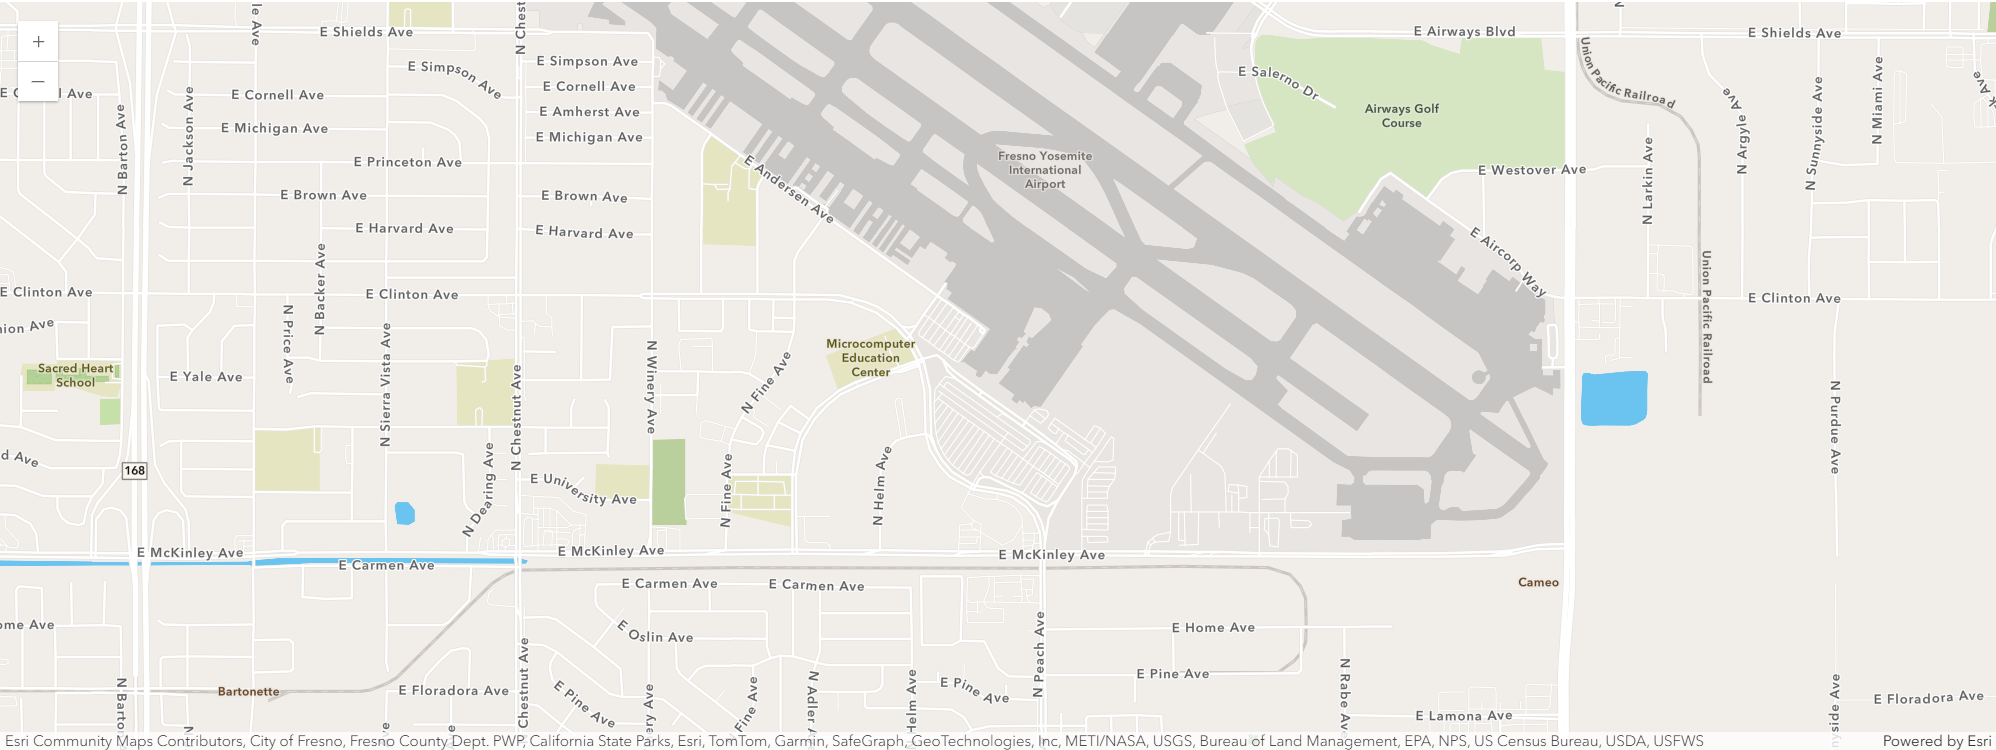

In [3]:
# Location of the ground station
location = gis.map(location="Fresno Yosemite International California")
location

In [4]:
location.zoom = 12

<Item title:"Weather Data of Fresno International California" type:Feature Layer Collection owner:api_data_owner>
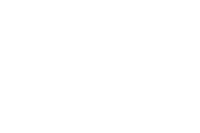

In [5]:
# Access the data table
data_table = gis.content.get("8c58e808aabd40408f7bc4eeac64fffb")
data_table

In [6]:
# Visualize as pandas dataframe
climate_data = data_table.tables[0]
climate_df = climate_data.query().sdf
climate_df.head()

,STATION,NAME,DATE,AWND,PRCP,PSUN,SNOW,TAVG,TMAX,TMIN,TSUN,WSFG,ObjectId
0,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-01-01,<NA>,0.0,<NA>,0,51.2,66.3,36.2,<NA>,<NA>,1
1,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-02-01,<NA>,0.78,<NA>,0,49.0,62.2,35.8,<NA>,<NA>,2
2,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-03-01,<NA>,2.29,<NA>,0,53.2,65.6,40.7,<NA>,<NA>,3
3,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-04-01,<NA>,2.28,<NA>,0,59.8,71.8,47.7,<NA>,<NA>,4
4,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-05-01,<NA>,0.96,<NA>,0,65.2,79.7,50.7,<NA>,<NA>,5


The dataframe above contains columns for station ID (STATION), station name (NAME), Date (DATE), Wind speed (AWND), precipitation (PRCP), possible sunshine (PSUN), snow cover (SNOW), average temperature (TAVG), maximum temperature (TMAX), minimum temperature (TMIN), total sunshine (TSUN), and peak wind gust speed (WSFG).

In [7]:
climate_df.shape

(815, 13)

Next, the dataset is prepared by dropping the variables for station, possible sunshine, snow cover, maximum temperature, minimum temperature, total sunshine, and peak wind gust speed. Then, the dataset is narrowed to the data from 1987 on, to avoid missing values.

In [8]:
climate_df = climate_df.drop(
    ["ObjectId", "STATION", "NAME", "PSUN", "SNOW", "TSUN",'TMAX', 'TMIN', "WSFG"], axis=1
)

In [9]:
climate_df.columns

Index(['DATE', 'AWND', 'PRCP', 'TAVG'], dtype='object')

In [10]:
# Selecting dataset from year 1987 to get continous data without NAN values
selected_df = climate_df[climate_df.DATE > "1987"]
selected_df.head()

,DATE,AWND,PRCP,TAVG
469,1987-02-01,5.8,1.36,52.7
470,1987-03-01,6.3,2.39,55.6
471,1987-04-01,6.9,0.07,66.6
472,1987-05-01,7.4,0.87,71.8
473,1987-06-01,7.4,0.01,78.4


Here, **TAVG** is our variable to be predicted, with **PRCP** and **AWND** being the predictors used, showing their influence on temperature.

In [11]:
selected_df.shape

(346, 4)

## Time series data preprocessing<a class="anchor" id="5"></a>   
The preprocessing of the data for multivariate time series modeling involves the following steps:

### Converting into time series format<a class="anchor" id="6"></a>
The dataset is now transformed into a time series data format by creating a new index that will be used by the model for processing the sequential data.

In [12]:
final_df = selected_df.reset_index()
final_df = final_df.drop("index", axis=1)
final_df.head()

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4


###  Data types of time series variables<a class="anchor" id="7"></a> 
Here we check the data types of the variables.

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    346 non-null    datetime64[us]
 1   AWND    346 non-null    string        
 2   PRCP    346 non-null    Float64       
 3   TAVG    346 non-null    Float64       
dtypes: Float64(2), datetime64[us](1), string(1)
memory usage: 11.6 KB


The time-dependent variables should of the type float. If a time-dependent variable is not of a float data type, then it needs to be changed to float. Here, Windspeed (AWND) is converted from object dtype to float64, as shown in the next cell.

In [14]:
final_df["AWND"] = final_df["AWND"].astype("float64")
final_df.head()

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4


### Checking autocorrelation of time dependent variables<a class="anchor" id="8"></a> 
The next step will determine if the time series sequence is autocorrelated. To ensure that our time series data can be modeled well, the strength of correlation of the variable with its past data must be estimated.

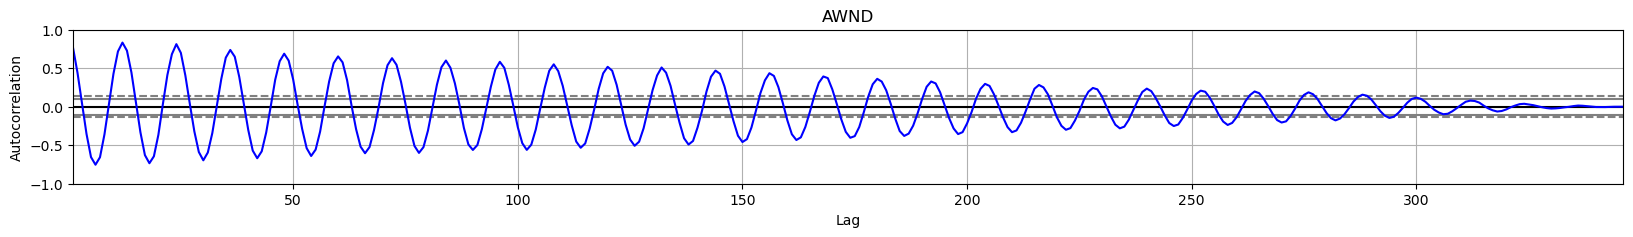

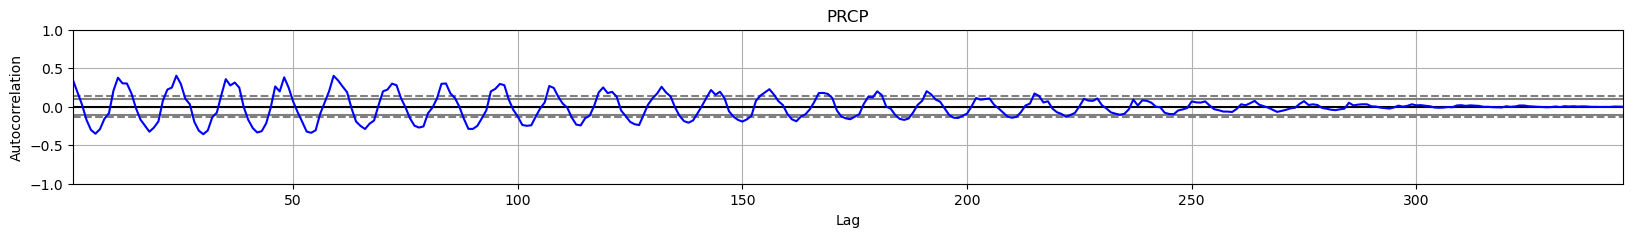

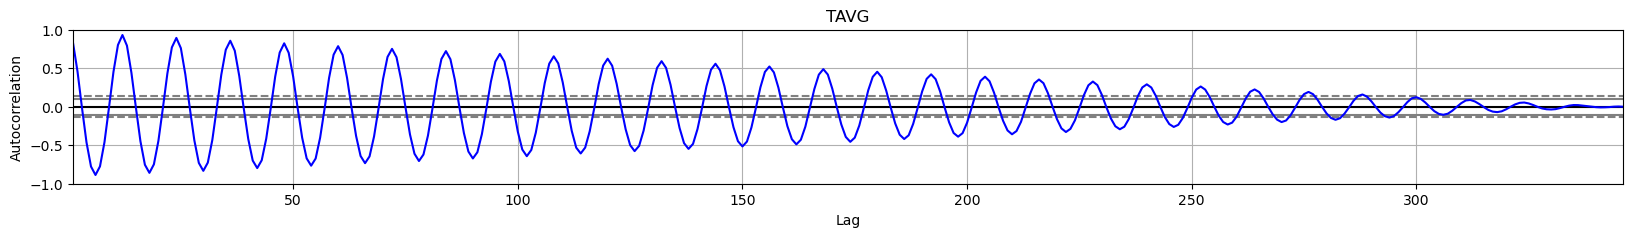

In [15]:
variables = ["AWND", "PRCP", "TAVG"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(final_df[variable], color="blue")
    plt.title(variable)

The plots are showing a significant correlation of the data with its immediate time-lagged terms, and that it gradually decreases over time as the lag increases.

### Creating dataset for prediction<a class="anchor" id="9"></a> 
Here, in the original dataset, the variable predict column of Average Temperature (TAVG) is populated with NaNs for the forecasting period of 2014-2015. This format is required for the `model.predict()` function in time series analysis, which will fill up the NaN values with forecasted temperatures.

In [16]:
predict_df = final_df.copy()
predict_df.loc[predict_df["DATE"] > "2013-12-01", "TAVG"] = None
predict_df.tail()

,DATE,AWND,PRCP,TAVG
341,2015-07-01,8.1,0.43,<NA>
342,2015-08-01,7.6,0.0,<NA>
343,2015-09-01,5.8,0.12,<NA>
344,2015-10-01,4.7,0.49,<NA>
345,2015-11-01,3.6,1.74,<NA>


### Train - Test split of time series dataset<a class="anchor" id="10"></a> 
Out of these 27 years(1987-2015), 25 years of data is used for training the model, with the remaining 23 months (2014-2015) being used for forecasting and validation. As we are splitting timeseries data, we set shuffle=False to keep the sequence intact and we set a test size of 23 months for validation.

In [17]:
from sklearn.model_selection import train_test_split

test_size = 23
train, test = train_test_split(final_df, test_size=test_size, shuffle=False)

In [18]:
train

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4
...,...,...,...,...
318,2013-08-01,7.2,0.0,83.0
319,2013-09-01,6.5,0.01,77.8
320,2013-10-01,3.4,0.03,66.6
321,2013-11-01,2.5,0.54,58.5


## Time series model building<a class="anchor" id="11"></a> 
After the train and test sets are created, the training set is ready for modeling.

### Data preprocessing <a class="anchor" id="12"></a>

In this example, the dataset contains 'AWND' (Windspeed), 'PRCP' (Precipitation), and 'TAVG' (Average Air temperature) as time-dependent variables leading to a multivariate time series analysis at a monthly time scale. These variables are used to forecast the next 23 months of air temperature for the months after the last date in the training data, or, in other words, these multiple explanatory variables are used to predict the future values of the dependent air temperature variable.

Once the variables are identified, the preprocessing of the data is performed by the `prepare_tabulardata` method from the `arcgis.learn` module in the ArcGIS API for Python. This function takes either a non-spatial data frame, a feature layer, or a spatial data frame containing the dataset as input and returns a TabularDataObject that can be fed into the model. By default, `prepare_tabulardata` scales/normalizes the numerical columns in a dataset using StandardScaler.
The primary input parameters required for the tool are:

- <span style='background :lightgrey' >input_features</span> : Takes the spatially enabled dataframe as a feature layer in this model
- <span style='background :lightgrey' >variable_predict</span> : The field name of the forecasting variable
- <span style='background :lightgrey' >explanatory_variables</span> : A list of the field names that are used as time-dependent variables in multivariate time series
- <span style='background :lightgrey' >index_field</span> : The field name containing the timestamp that will be used as the index field for the data and to visualize values on the x-axis in the time series

In [19]:
data = prepare_tabulardata(
    train,
    variable_predict="TAVG",
    explanatory_variables=["AWND", "PRCP"],
    index_field="DATE",
    seed=42,
)

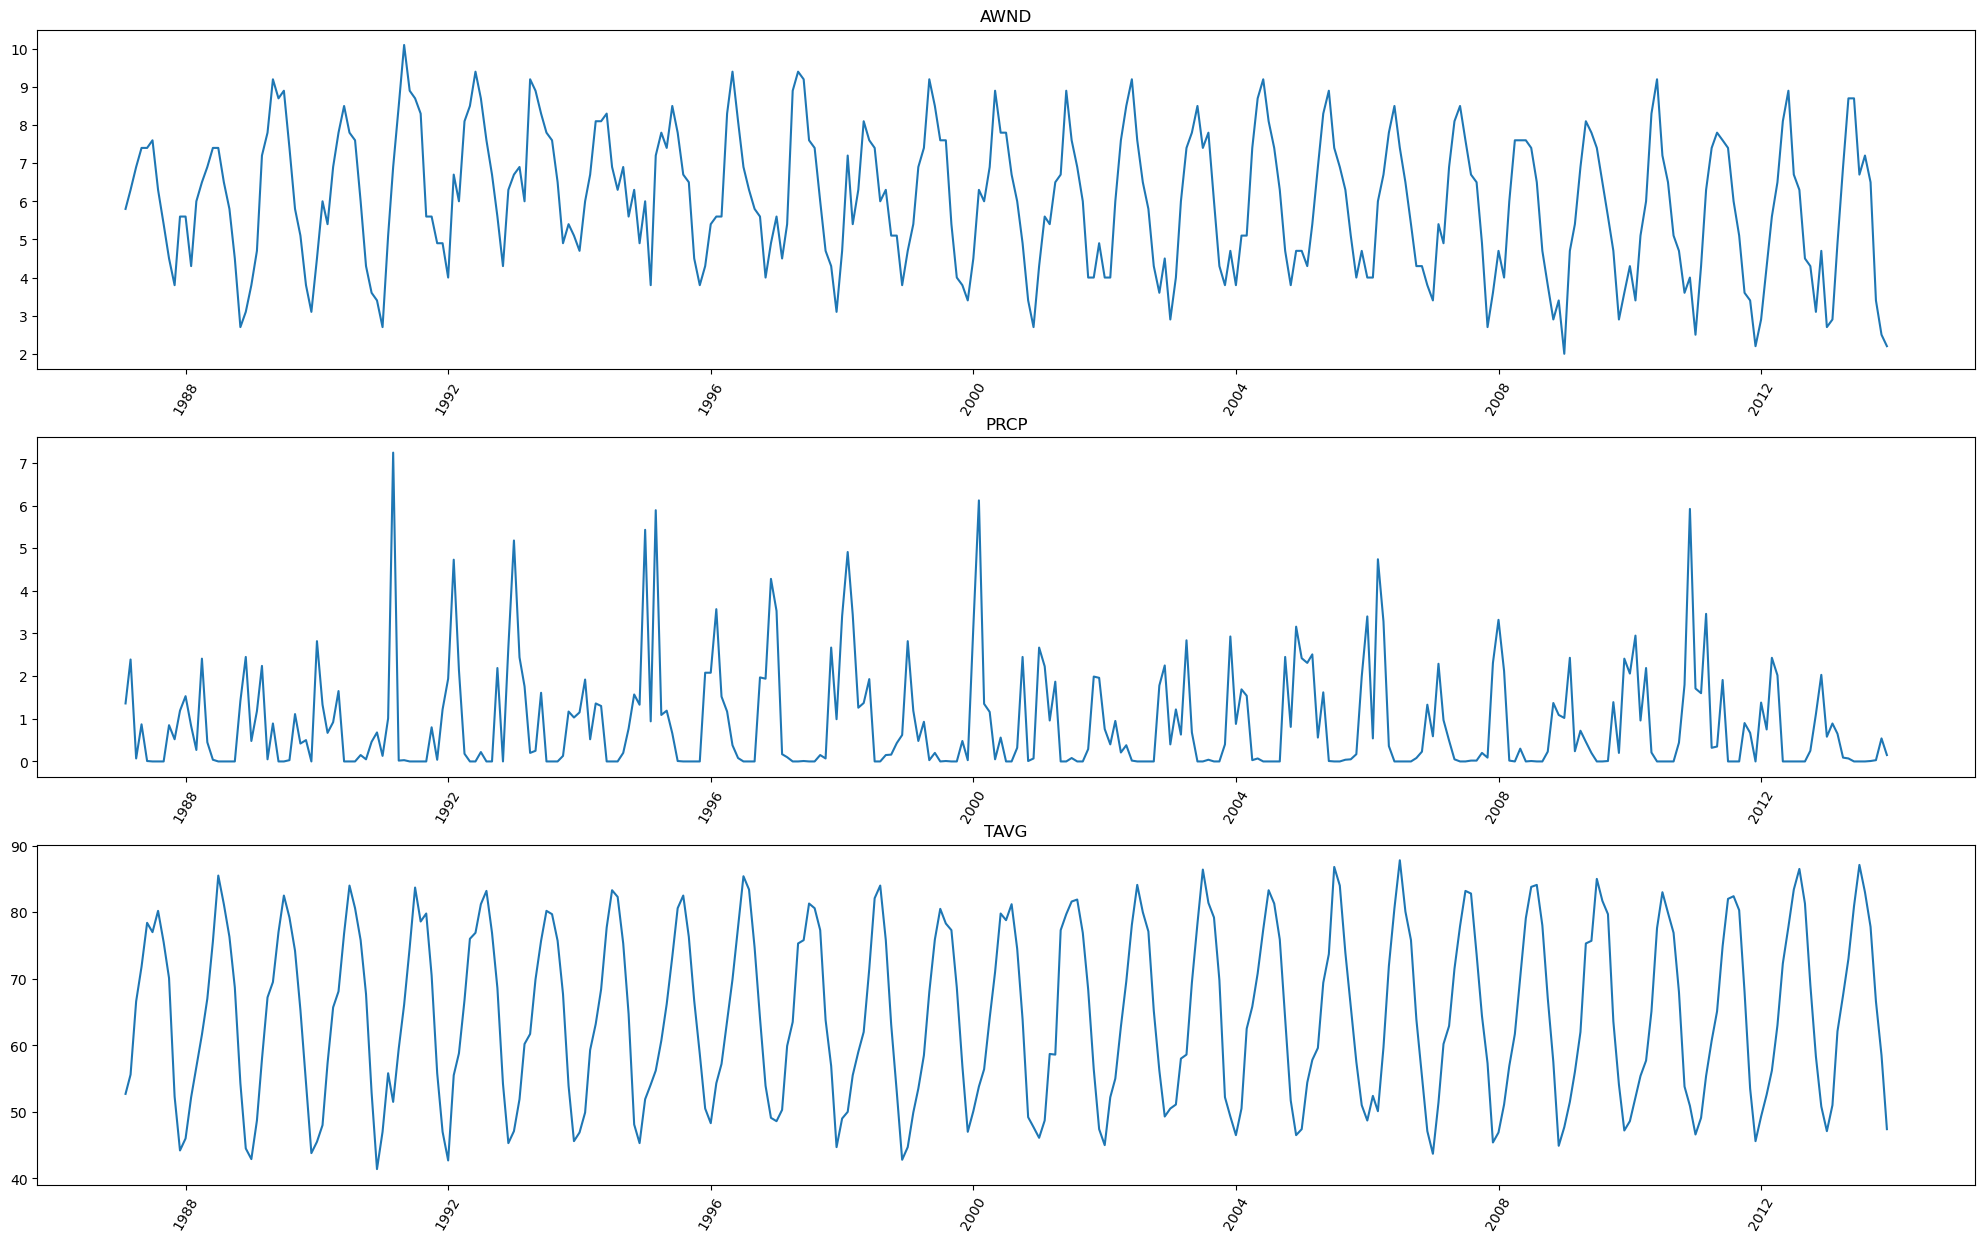

In [20]:
# Visualize the entire timeseries data
data.show_batch(graph=True)

In [21]:
# Here sequence length is used as 12 which also indicates the seasonality of the data
seq_len = 12

Next, we visualize the timeseries in batches. Here, we will pass the sequence length as the batch length.

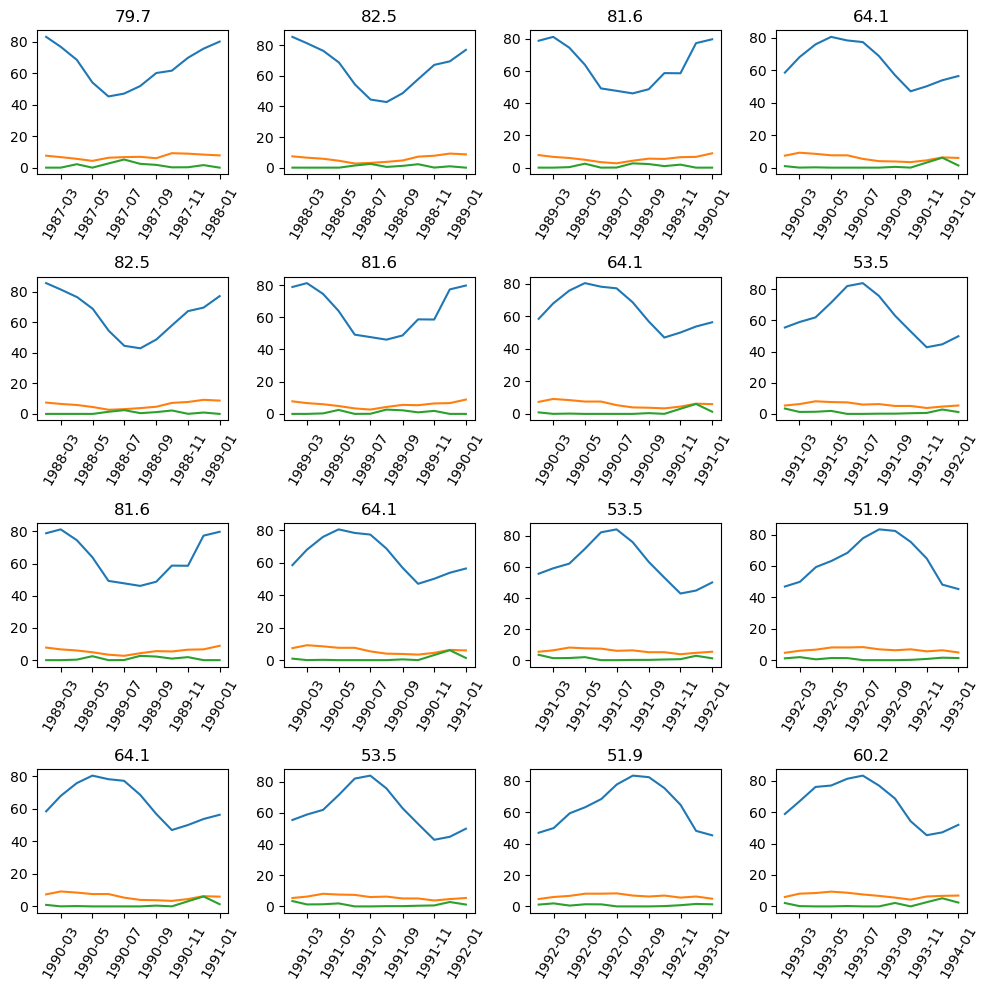

In [22]:
data.show_batch(rows=4, seq_len=seq_len)

### Model initialization <a class="anchor" id="13"></a>

This is an important step for fitting a time series model. Here, along with the input dataset, the backbone for training the model and the sequence length are passed as parameters. Out of these three, the sequence length has to be selected carefully. The sequence length is usually the cycle of the data, which in this case is 12, as it is monthly data and the pattern repeats after 12 months. In model initialization, the data and the backbone are selected from the available set of InceptionTime, ResCNN, Resnet, and FCN.

In [23]:
tsmodel = TimeSeriesModel(data, seq_len=seq_len, model_arch="ResCNN")

### Learning rate search<a class="anchor" id="14"></a>
Here, we find the optimal learning rate for training the model.

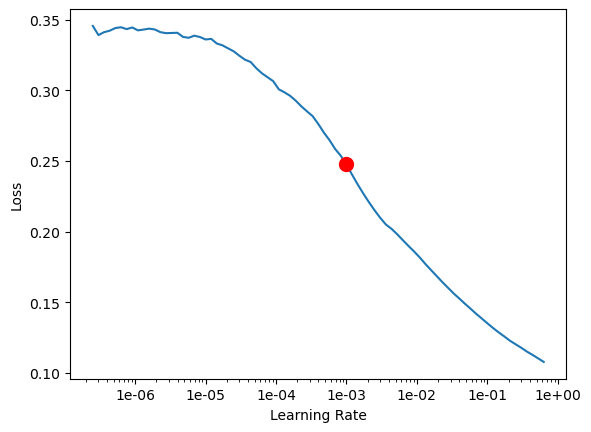

In [24]:
lr_rate = tsmodel.lr_find()

### Model training <a class="anchor" id="15"></a>

The model is now ready for training. To train the model, the `model.fit` method is used and is provided with the number of epochs for training and the learning rate suggested above as parameters:

In [25]:
tsmodel.fit(100, lr=lr_rate)

epoch,train_loss,valid_loss,time
0,0.310286,0.423338,00:00
1,0.275722,0.448131,00:00
2,0.255630,0.455907,00:00
3,0.241989,0.447964,00:00
4,0.226251,0.426619,00:00
5,0.208684,0.400359,00:00
6,0.192922,0.363881,00:00
7,0.176154,0.298561,00:00
8,0.157976,0.231826,00:00
9,0.140461,0.158557,00:00


To check the quality of the trained model and whether the model needs more training, we generate a train vs validation loss plot below:

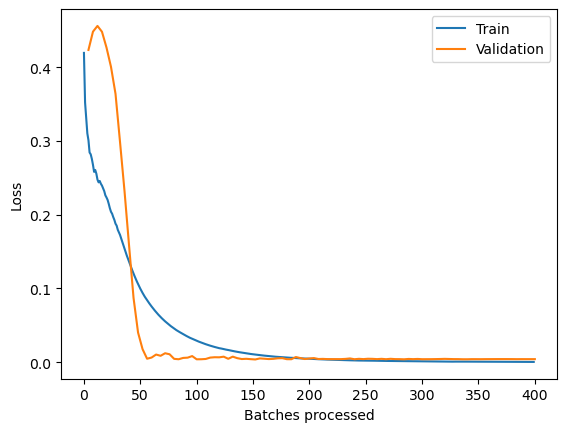

In [26]:
tsmodel.plot_losses()

Next, the predicted values of the model and the actual values are printed for the training dataset.

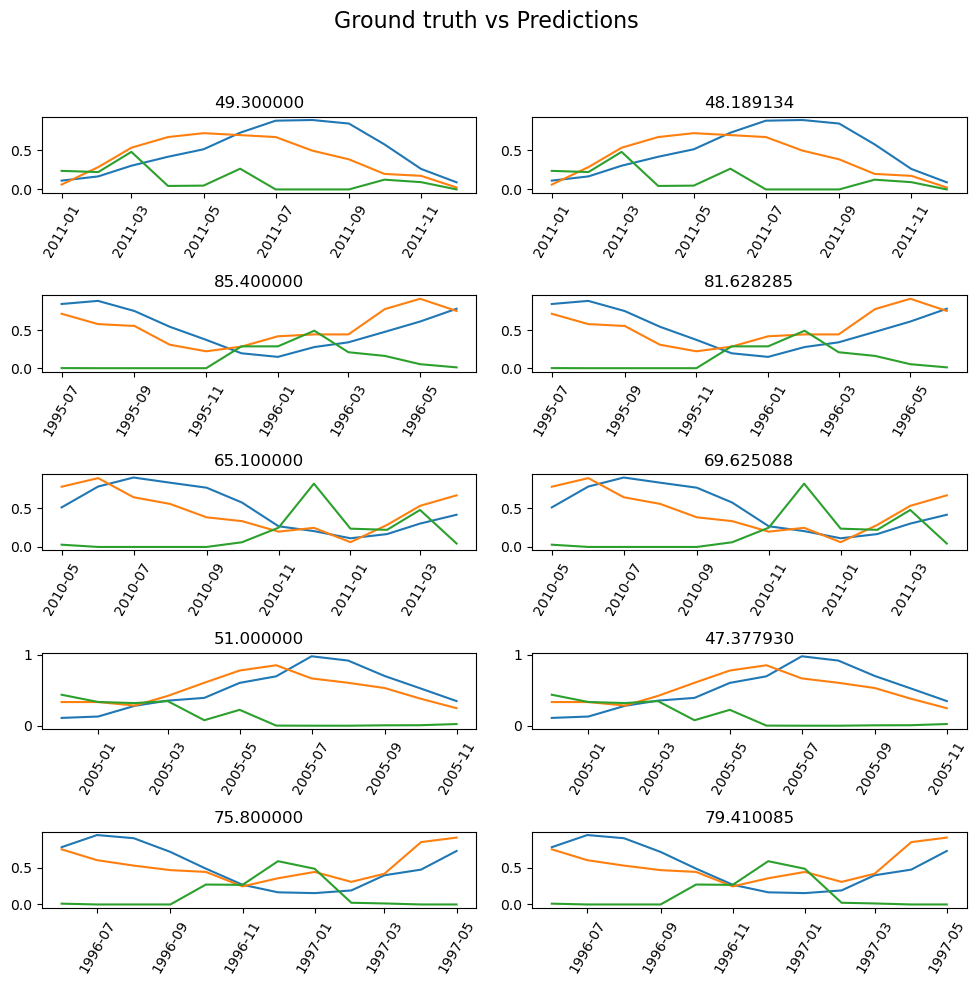

In [27]:
tsmodel.show_results(rows=5)

## Air temperature forecast & validation <a class="anchor" id="16"></a>

### Forecasting using the trained TimeSeriesModel <a class="anchor" id="17"></a>
During forecasting, the model uses the dataset prepared above with NaN values as input, with the `prediction_type` set as `dataframe`.

In [28]:
# Checking the input dataset
predict_df.tail(23)

,DATE,AWND,PRCP,TAVG
323,2014-01-01,2.5,0.57,<NA>
324,2014-02-01,4.9,2.11,<NA>
325,2014-03-01,5.8,0.62,<NA>
326,2014-04-01,6.9,0.74,<NA>
327,2014-05-01,8.9,0.04,<NA>
328,2014-06-01,8.1,0.0,<NA>
329,2014-07-01,7.4,0.01,<NA>
330,2014-08-01,6.7,0.0,<NA>
331,2014-09-01,6.3,0.18,<NA>
332,2014-10-01,4.5,0.5,<NA>


In [29]:
df_forecasted = tsmodel.predict(predict_df, prediction_type="dataframe")

In [30]:
# Final forecasted result returned by the model
df_forecasted

,DATE,AWND,PRCP,TAVG,TAVG_results
0,1987-02-01,5.8,1.36,52.7,52.700000
1,1987-03-01,6.3,2.39,55.6,55.600000
2,1987-04-01,6.9,0.07,66.6,66.600000
3,1987-05-01,7.4,0.87,71.8,71.800000
4,1987-06-01,7.4,0.01,78.4,78.400000
...,...,...,...,...,...
341,2015-07-01,8.1,0.43,<NA>,84.163592
342,2015-08-01,7.6,0.0,<NA>,82.447527
343,2015-09-01,5.8,0.12,<NA>,77.235326
344,2015-10-01,4.7,0.49,<NA>,67.781964


Next, we format the results into actual vs predicted columns.

In [31]:
result_df = pd.DataFrame()
result_df["DATE"] = test["DATE"]
result_df["Airtemp_actual"] = test["TAVG"]
result_df["Airtemp_predicted"] = df_forecasted["TAVG_results"][-23:]
result_df = result_df.set_index(result_df.columns[0])
result_df

,Airtemp_actual,Airtemp_predicted
DATE,,
2014-01-01,53.2,48.860895
2014-02-01,56.8,52.326221
2014-03-01,62.3,56.836939
2014-04-01,66.8,64.082414
2014-05-01,74.2,73.612447
2014-06-01,80.9,77.132795
2014-07-01,86.9,81.647268
2014-08-01,84.4,81.938713
2014-09-01,80.7,77.517083


### Estimate model metrics for validation <a class="anchor" id="18"></a>
The accuracy of the forecasted values is measured by comparing the forecasted values against the actual values for the 23 months chosen for testing.

In [32]:
import sklearn.metrics as metrics

r2 = metrics.r2_score(result_df["Airtemp_actual"], result_df["Airtemp_predicted"])
mse = metrics.mean_squared_error(
    result_df["Airtemp_actual"], result_df["Airtemp_predicted"]
)
rmse = metrics.mean_absolute_error(
    result_df["Airtemp_actual"], result_df["Airtemp_predicted"]
)
print(
    "RMSE:     ",
    round(np.sqrt(mse), 4),
    "\n" "MAE:      ",
    round(rmse, 4),
    "\n" "R-Square: ",
    round(r2, 2),
)

RMSE:      4.1738 
MAE:       3.6122 
R-Square:  0.88


A considerably high r-square value of .91 indicates a high similarity between the forecasted values and the actual values. Furthermore, the RMSE error of 3.661 is quite low, indicating a good fit by the model.

## Result visualization<a class="anchor" id="19"></a>
Finally, the actual and forecasted values are plotted to visualize their distribution over the validation period, with the orange line representing the forecasted values and the blue line representing the actual values.

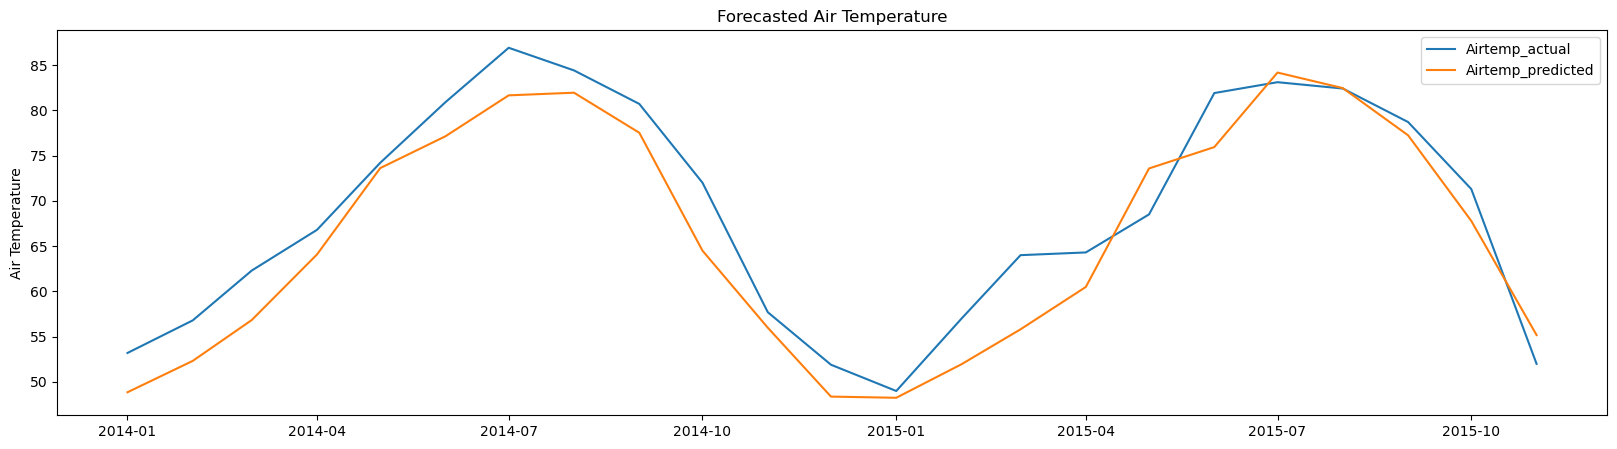

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(result_df)
plt.ylabel("Air Temperature")
plt.legend(result_df.columns.values, loc="upper right")
plt.title("Forecasted Air Temperature")
plt.show()

## Conclusion<a class="anchor" id="20"></a>

The study conducted a multivariate time series analysis using the Deep learning TimeSeriesModel from the arcgis.learn library and forecasted the monthly Air temperature for a station in California. The model was trained with 25 years of data (1987-2013) that was used to forecast a period of 2 years (2014-2015) with high accuracy. The independent variables were wind speed and precipitation. The methodology included preparing a times series dataset using the prepare_tabulardata() method, followed by modeling, predicting, and validating the test dataset. Usually, time series modeling requires fine-tuning several hyperparameters for properly fitting the data, most of which has been internalized in this Model, leaving the user responsible for configuring only a few significant parameters, like the sequence length.

## Summary of methods used <a class="anchor" id="21"></a>

| Method | Description | Examples |
| -| - |-|
| prepare_tabulardata| prepare data including imputation, scaling and train-test split  |prepare data ready for fitting a  Timeseries Model 
| model.lr_find()| finds an optimal learning rate  | finalize a good learning rate for training the Timeseries model
| TimeSeriesModel() | Model Initialization by selecting the TimeSeriesModel algorithm to be used for fitting  | Selected Timeseries algorithm from Fastai time series regression can be used
| model.fit() | trains a model with epochs & learning rate as input  | training the Timeseries model with suitable input 
| model.predict() | predicts on a test set | forecast values using the trained models on the test input

## References<a class="anchor" id="22"></a>
- Jenny Cifuentes et.al., 2020. "Air Temperature Forecasting Using Machine Learning Techniques: A Review" 
https://doi.org/10.3390/en13164215

- Xuejie, G. et.al., 2001. "Climate change due to greenhouse effects in China as simulated by a regional climate model" https://doi.org/10.1007/s00376-001-0036-y

- "gsom-gsoy_documentation" https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf

- "Prediction task with Multivariate Time Series and VAR model" https://towardsdatascience.com/prediction-task-with-multivariate-timeseries-and-var-model-47003f629f9

## Data resources <a class="anchor" id="23"></a>

| Dataset | Source | Link |
| -| - |-|
|Global Summary of the Month|NOAA Climate Data Online |https://www.ncdc.noaa.gov/cdo-web/search|